<h2>Imports</h2>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from rich.console import Console
# from rich.table import Table
# from rich.panel import Panel
# from rich.text import Text
# from rich import box
# from rich.theme import Theme
import warnings
warnings.filterwarnings('ignore')

# Set the style and color palette
sns.set_palette("viridis")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis(np.linspace(0, 1, 20)))

<h2>Loading Dataset</h2>

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<h2>Missing Values Check</h2>

In [4]:
print(df.isnull().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


<h2> Dataset Statistics</h2>

In [5]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Visualize the Distribution of Features


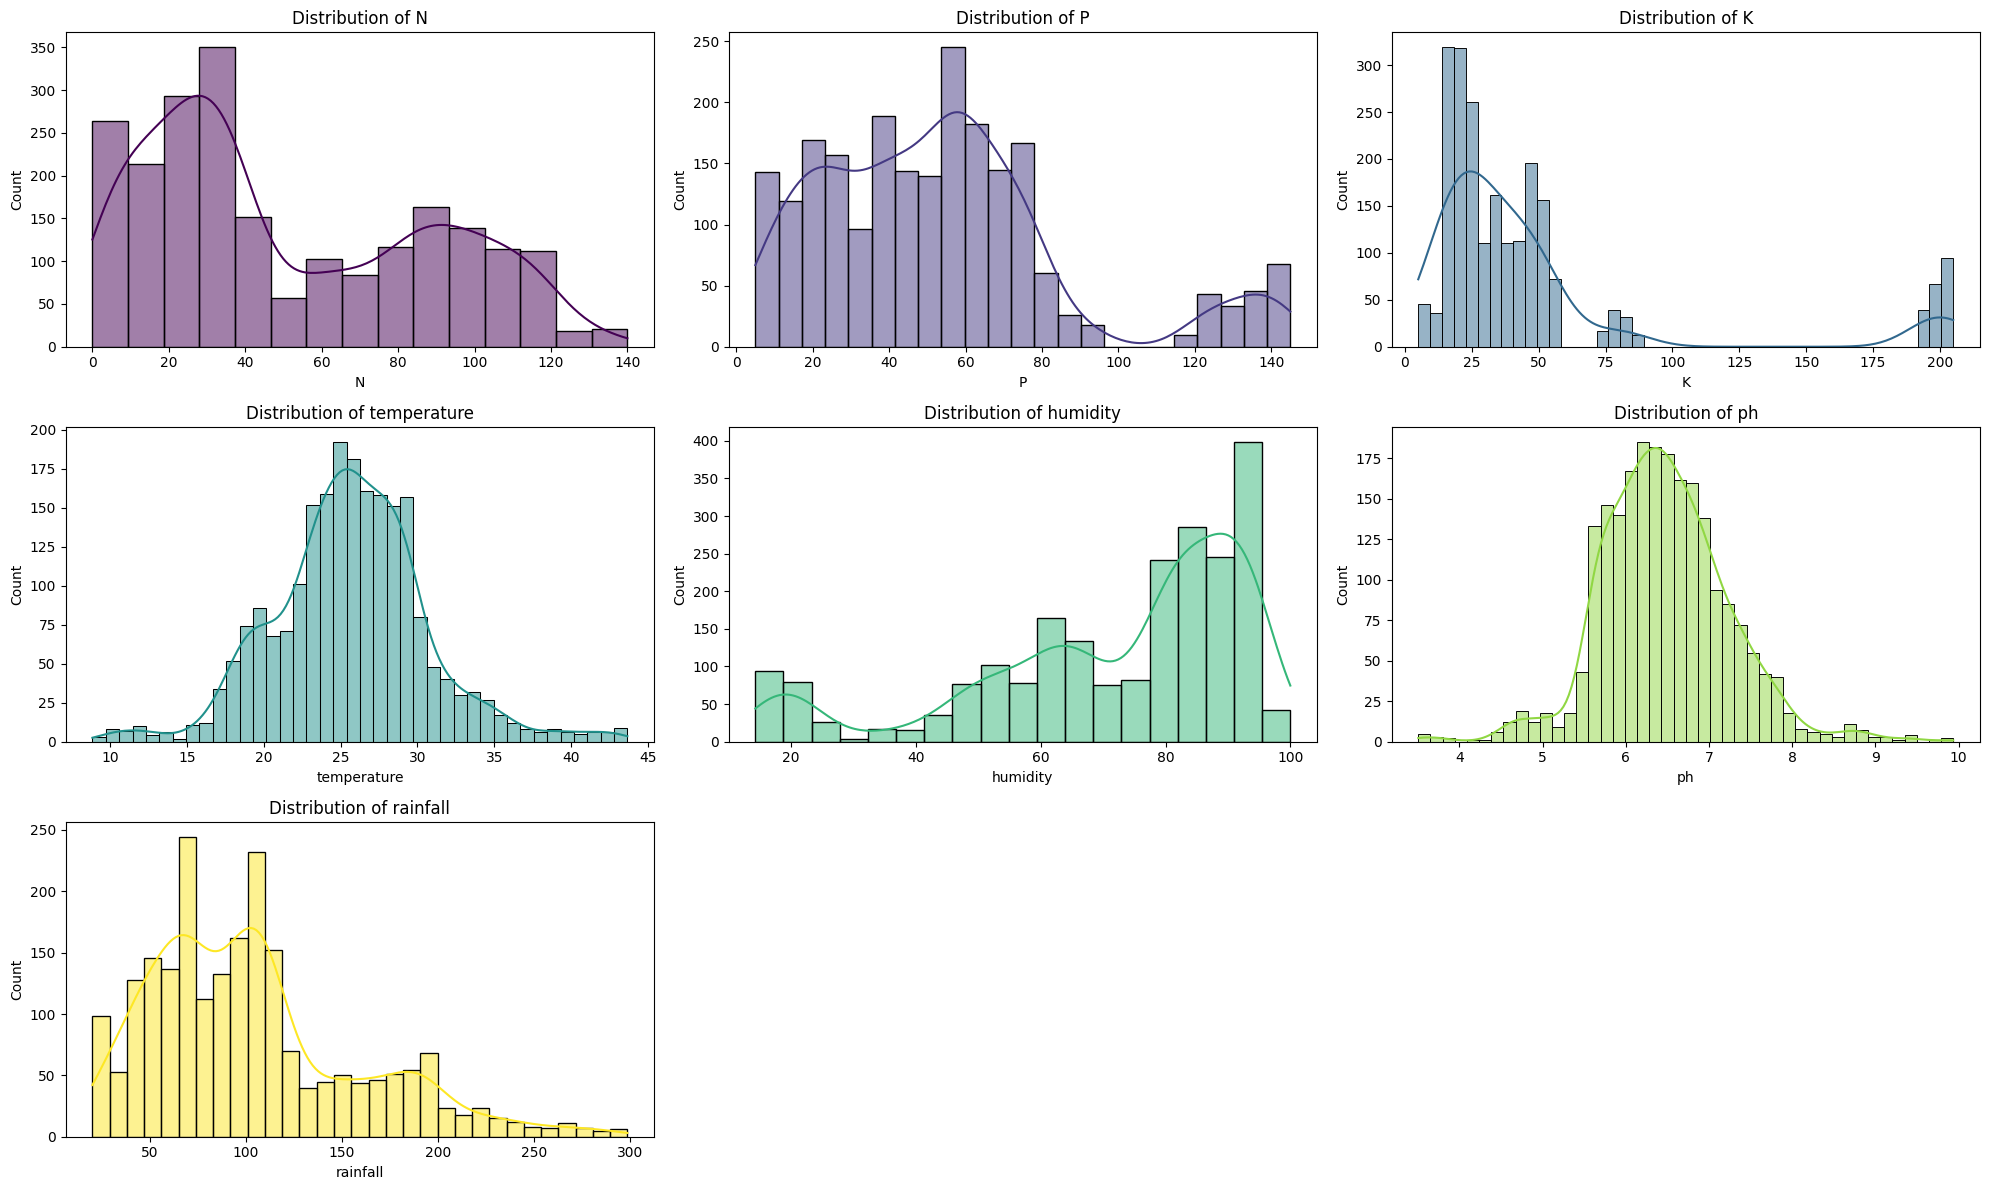

In [6]:
plt.figure(figsize=(20, 12))
colors = plt.cm.viridis(np.linspace(0, 1, 7))

for i, (column, color) in enumerate(zip(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], colors)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=column, kde=True, color=color)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Box Plot of Features

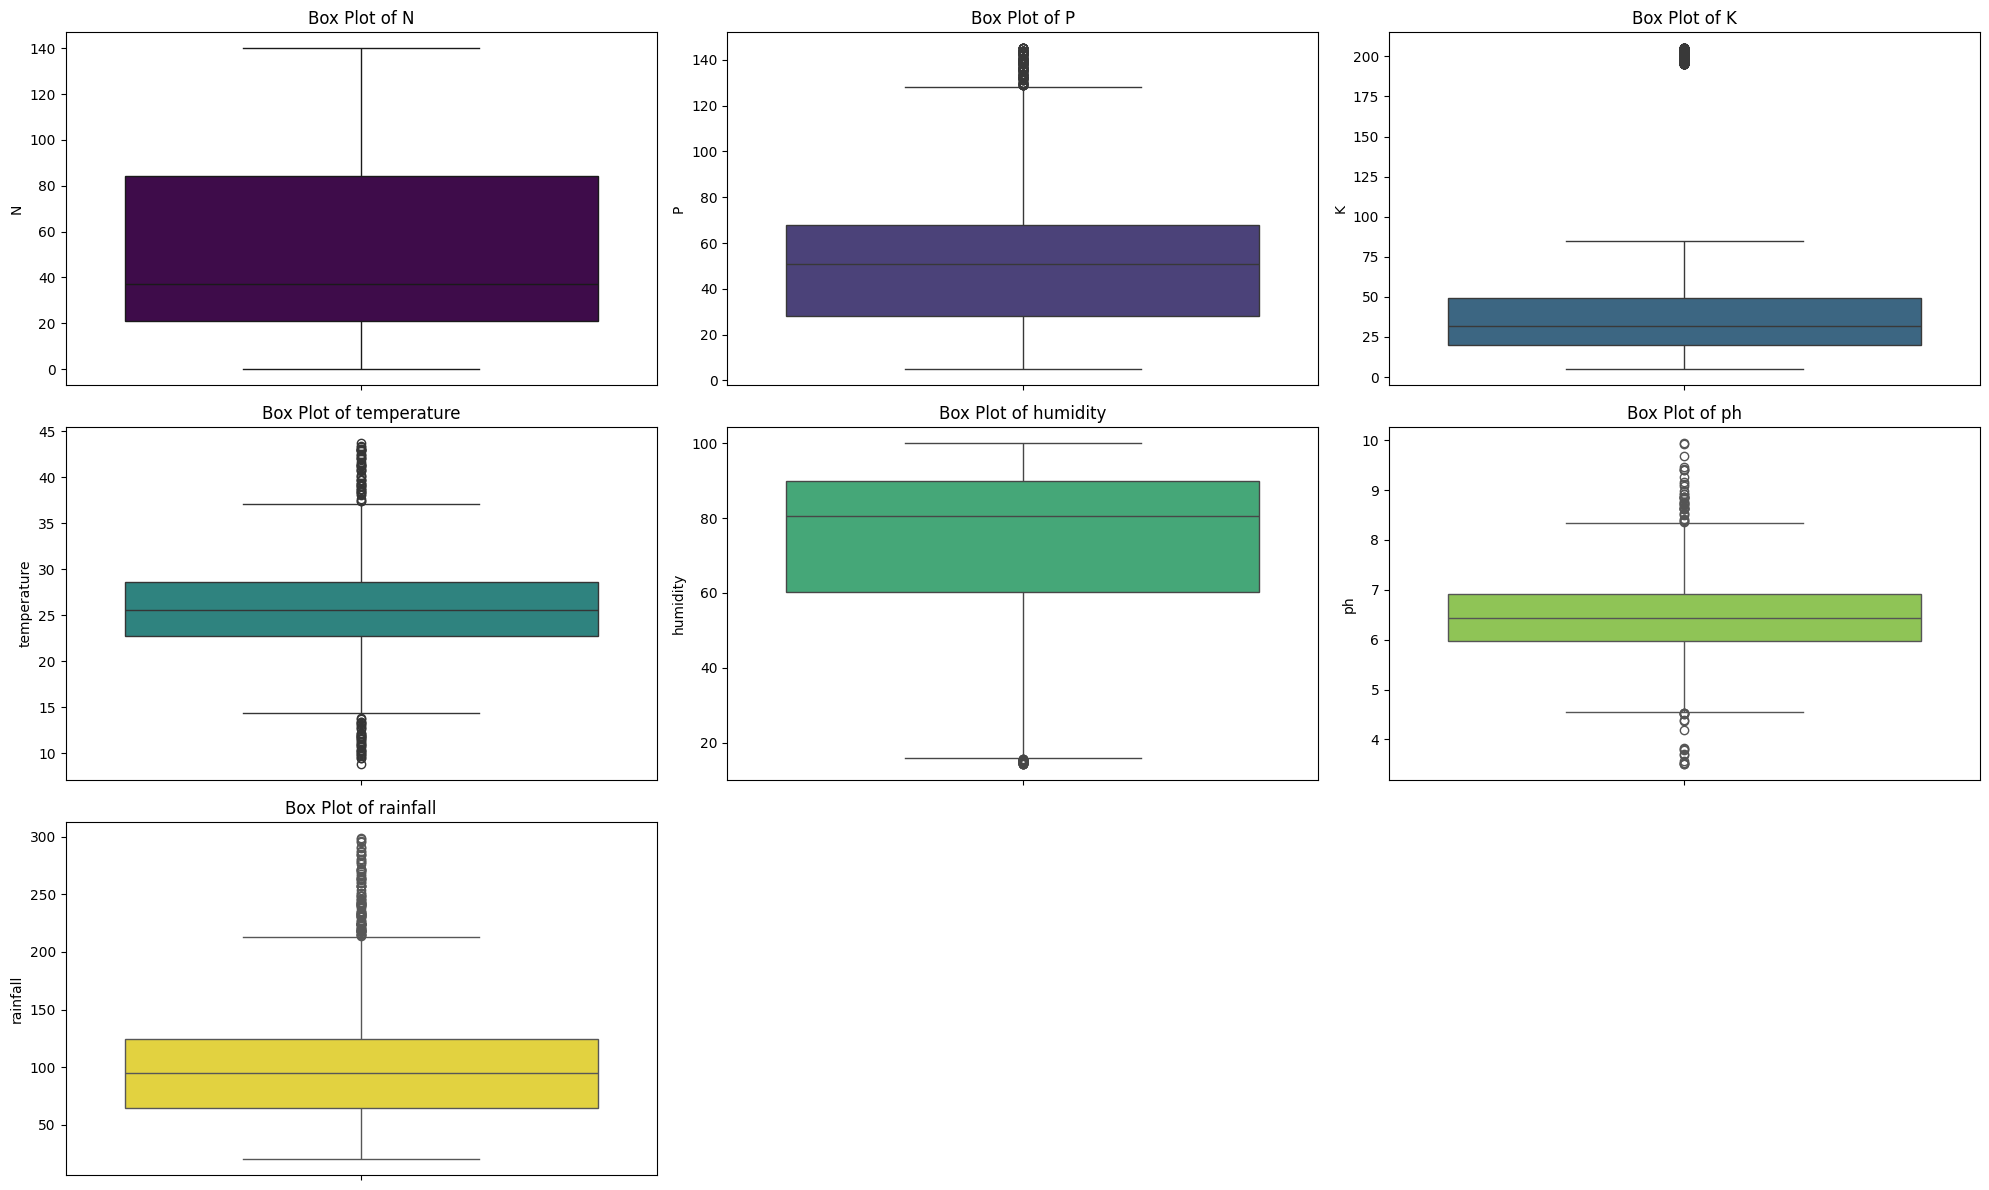

In [7]:
plt.figure(figsize=(20, 12))
for i, (column, color) in enumerate(zip(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], colors)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=column, color=color)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# Correlation Heatmap


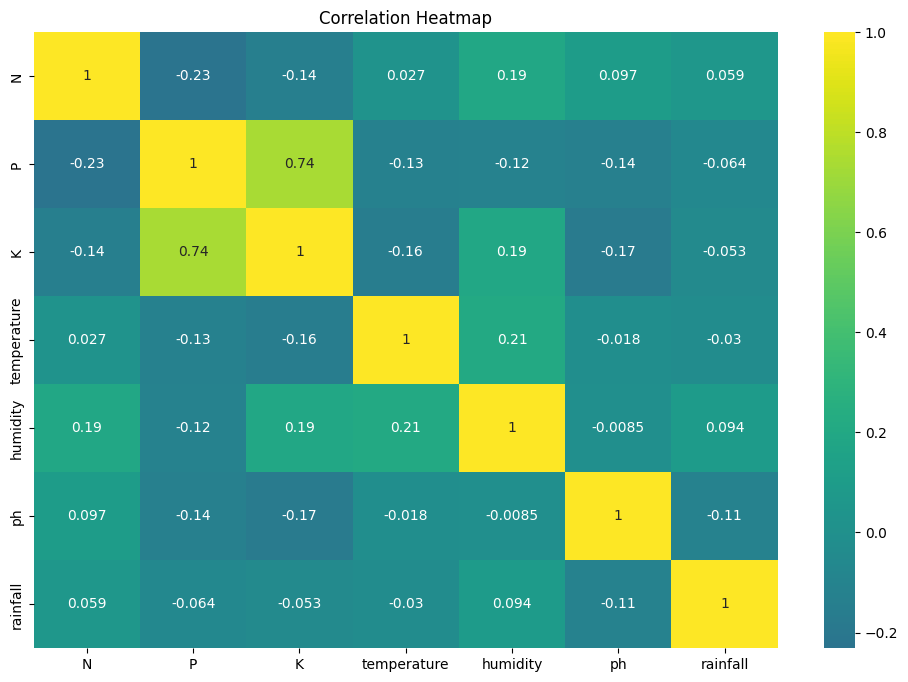

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop('label', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Crops


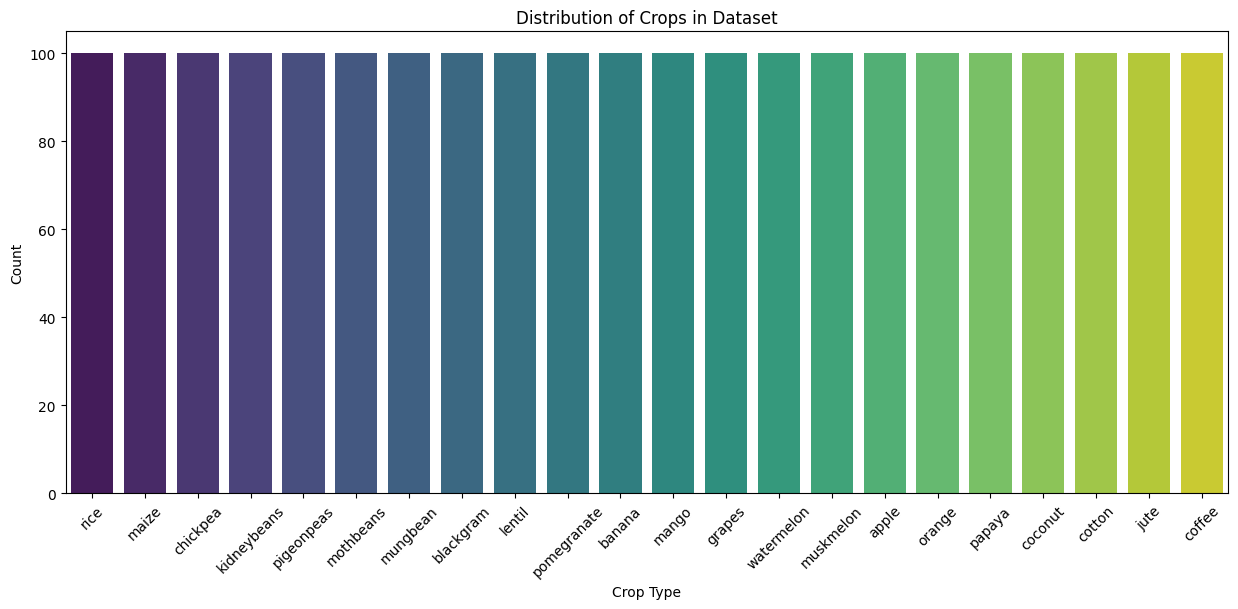

In [9]:

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='label', palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Crops in Dataset')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()


# Scatter Plots of Feature Relationships

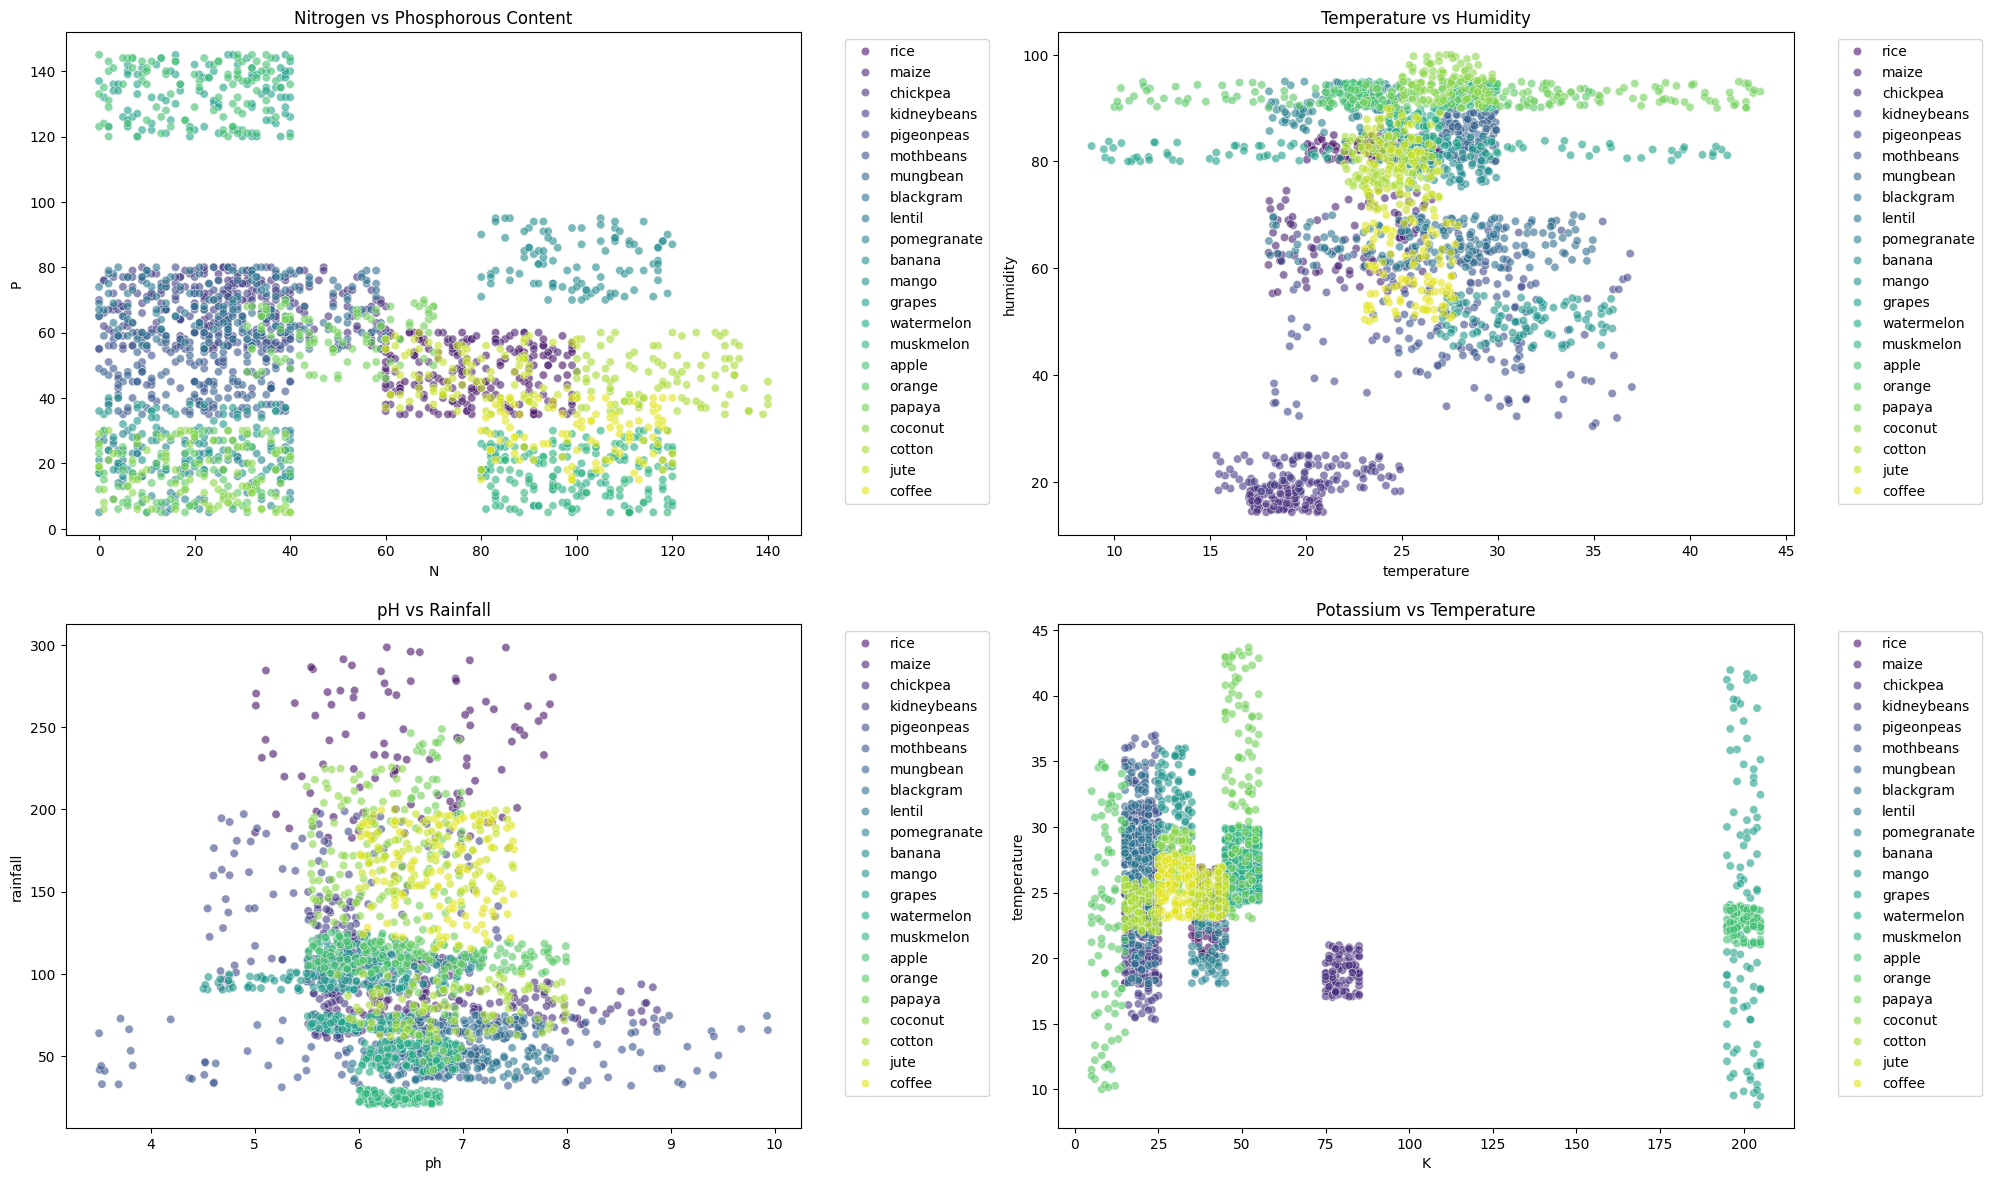

In [10]:

plt.figure(figsize=(20, 12))

# N vs P
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='N', y='P', hue='label', palette='viridis', alpha=0.6)
plt.title('Nitrogen vs Phosphorous Content')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Temperature vs Humidity
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='temperature', y='humidity', hue='label', palette='viridis', alpha=0.6)
plt.title('Temperature vs Humidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# pH vs Rainfall
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='ph', y='rainfall', hue='label', palette='viridis', alpha=0.6)
plt.title('pH vs Rainfall')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# K vs Temperature
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='K', y='temperature', hue='label', palette='viridis', alpha=0.6)
plt.title('Potassium vs Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Skewness Analysis


In [11]:

print("Skewness Analysis:")
print("=================")
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in numerical_features:
    skewness = df[feature].skew()
    print(f"{feature}: {skewness:.3f}")


Skewness Analysis:
N: 0.510
P: 1.011
K: 2.375
temperature: 0.185
humidity: -1.092
ph: 0.284
rainfall: 0.966
